# Question 3

We start by checking we have the correct working directory (that contains the data sets). 

In [20]:
getwd()
library(glmnet)

[1] "C:/Users/jbash/OneDrive - Carleton University/ECON5880/Assignments"

## (a)+(b)  <br>
i. Load both datasets: <br> 


In [21]:
test<-read.csv("a1q3test.csv")
train<-read.csv("a1q3train.csv")


ii. Drop latitude/longitude from the data: 

In [22]:
test<- test[,1:7]
train<- train[,1:7]

iii. label medhv and medinc. <br>
I decided to label all the variables to make my life easier. 

In [23]:
test<- data.frame(medhv=test$V1, medinc=test$V2, medHA=test$V3, rooms=test$V4, bedrooms=test$V5,
                             blockPop=test$V6, noHH=test$V7)
train<- data.frame(medhv=train$V1, medinc=train$V2, medHA=train$V3, rooms=train$V4, bedrooms=train$V5,
                             blockPop=train$V6, noHH=train$V7)

iv. Create some variables. 

In [24]:
test <- cbind( test, lage=log(test$medHA), lrms=log(test$rooms/test$blockPop), 
               lbed=log(test$bedrooms/test$blockPop), lpop=log(test$blockPop/test$noHH), lhhs=log(test$noHH) )
train <- cbind( train, lage=log(train$medHA), lrms=log(train$rooms/train$blockPop), 
               lbed=log(train$bedrooms/train$blockPop), lpop=log(train$blockPop/train$noHH), lhhs=log(train$noHH) )

v. drop variables.

In [25]:
test <- test[,c(1,2,8,9,10,11,12)]
train <- train[,c(1,2,8,9,10,11,12)]

vi. Drop top-coded observations

In [26]:
#number of observations to be dropped from each sample: 
cat("number of observations dropped from test is: " , sum(with(test, medhv==500001)) , "\n")
cat("number of observations dropped from train is: ", sum(with(train, medhv==500001)), "\n")
#we currently have: 
cat("test data set currently has ", nrow(test), "observations \n")
cat("training data set currently has", nrow(train), "observations \n") 
#so we drop them: 
test <- subset(test, medhv!=500001)
train <- subset(train, medhv!=500001)
#and we check: 
cat("test data has ",nrow(test)," observations after dropping \n")
cat("training data has", nrow(train), "observations after dropping \n")
cat("It all looks good")


number of observations dropped from test is:  56 
number of observations dropped from train is:  40 
test data set currently has  1000 observations 
training data set currently has 1000 observations 
test data has  944  observations after dropping 
training data has 960 observations after dropping 
It all looks good

Our data looks like: 

In [27]:
nrow(test)
head(test)
nrow(train)
head(train)

[1] 944

,medhv,medinc,lage,lrms,lbed,lpop,lhhs
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80900,1.5900,3.891820,0.2963331,-1.1151416,1.1834204,6.146329
2,290900,5.2534,3.433987,0.7176085,-0.9818835,0.9734801,6.575076
3,156700,4.8073,2.397895,0.6727643,-1.1151416,1.2247848,5.451038
4,423900,7.7865,3.526361,0.8462381,-0.9898285,0.9948285,5.988961
5,270000,4.3898,3.951244,0.4721058,-1.1046913,1.2006115,6.102559
6,454100,8.0074,2.890372,1.0326705,-1.0028161,1.0460097,6.487684


[1] 960

,medhv,medinc,lage,lrms,lbed,lpop,lhhs
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,277800,4.2065,2.708050,1.05706553,-0.5477552,0.6810124,6.122493
2,395100,5.0457,3.526361,0.96837816,-0.7855612,0.8767306,6.492240
3,173400,1.9309,3.433987,-0.02744502,-1.2569152,1.3526138,6.148468
4,195700,3.3021,3.583519,0.75456999,-0.7949945,0.8612714,6.146329
5,184300,4.7068,1.791759,0.51626042,-1.1854903,1.2433752,7.226936
6,55500,2.0324,3.555348,0.46921343,-0.9492122,0.9698315,5.480639


## (c) <br>
<br> 
i. change the dataframes to model.matrix

In [28]:
x=model.matrix(medhv~. , data=train)[,-1]
y=train$medhv

xtest=model.matrix(medhv~. , data=test)[,-1]

ii. We choose our lambda with 10-fold cross validation. 

In [29]:
cvRidge=cv.glmnet(x,y, alpha=0, nfolds=10)
lambdaRidge=cvRidge$lambda.min
cvLasso=cv.glmnet(x,y, alpha=1, nfolds=10)
lambdaLasso=cvLasso$lambda.min

iii. run ridge and lasso on training set. I will store them in ridge1 and lasso1

In [30]:
ridge1 <- glmnet(x, y, alpha=0, lambda=lambdaRidge )
lasso1 <- glmnet(x, y, alpha=1, lambda=lambdaLasso)

iv. Use test data. Report RMSE for ridge and lasso. 

In [31]:
rmseRidge1 <- sqrt(     mean(     (  test$medhv-predict(ridge1, xtest)    )^2    )      )
rmseLasso1 <- sqrt(     mean(     (  test$medhv-predict(lasso1, xtest)    )^2    )      )

In [32]:
cat("the RMSE for ridge regression is", rmseRidge1, "\n")
cat("the RMSE for lasso regression is", rmseLasso1, "\n")
cat("The difference is equal to", abs(rmseRidge1-rmseLasso1))

the RMSE for ridge regression is 70833.67 
the RMSE for lasso regression is 70801.81 
The difference is equal to 31.85417

v. The estimator with the lower RMSE does better. Therefore, Lasso does a better job at prediction. However, there is no big difference in results. This is because we expect that all of our vars are highly correlated with the outcome variable.   <br> 

## (d)

i. We chose our lambda with 20-fold cross validation. 

In [33]:
cvRidge2=cv.glmnet(x,y, alpha=0, nfolds=20)
lambdaRidge2=cvRidge2$lambda.min
cvLasso2=cv.glmnet(x,y, alpha=1, nfolds=20)
lambdaLasso2=cvLasso2$lambda.min


ii. run ridge and lasso on training set. I will store them in ridge2 and lasso2

In [34]:
ridge2 <- glmnet(x, y, alpha=0, lambda=lambdaRidge2 )
lasso2 <- glmnet(x, y, alpha=1, lambda=lambdaLasso2)

iii. Use test data. Report RMSE for ridge and lasso. 

In [35]:
rmseRidge2 <- sqrt(     mean(     (  test$medhv-predict(ridge2, xtest)    )^2    )      )
rmseLasso2 <- sqrt(     mean(     (  test$medhv-predict(lasso2, xtest)    )^2    )      )

In [36]:
cat("the RMSE for ridge regression is", rmseRidge2 , "\n")
cat("the RMSE for lasso regression is", rmseLasso2, "\n")
cat("The difference is equal to", abs(rmseRidge2-rmseLasso2), "\n")
cat("The RMSE for ridge changed by", rmseRidge2-rmseRidge1, "\n")
cat("The RMSE for lasso changed by", rmseLasso2-rmseLasso1, "\n")

the RMSE for ridge regression is 70833.67 
the RMSE for lasso regression is 70826.98 
The difference is equal to 6.681283 
The RMSE for ridge changed by 0 
The RMSE for lasso changed by 25.17289 


iv. <br>
the RMSE for ridge regression did not change much. However, the RMSE for lasso decreased *a bit*. In our opinion, the difference is not very large. <br> <br>
The reason : <br> <br>
Lambdas are found through the process of k-fold cross validation. The choice of k so far is entirely arbitrary. There could be an improvement in prediction with different choices of k. You would expect that a graph of (x=K and y=RMSE) to yield some sort of useful information for this. <br> <br>
The fact that the RMSE for ridge did not change much with the increase in K suggests that the model cannot be improved much. i.e. the plot of RMSE against K is likely flatish. <br> <br>
However, the fact that the RMSE for lasso improved a bit suggests that increasing K is beneficial. i.e. the plot of RMSE against K is likely downward sloping in the neighborhood of this K. **Why is that?** Well, it could be that lasso is thresholding variables that are not actually good for prediction. 

## (e)

i. Define new data frame that contains the squared terms. <br>
No it is not the best solution but i couldn't find a command that worked for interactions within regression commands for all vars .

In [37]:
trainE<-cbind(medhv=train[,1], train[,2:7], sq=train[,2:7]^2)
testE<-cbind(medhv=test[,1], test[,2:7], sq=test[,2:7]^2)

names(trainE)
names(testE)

[1] "medhv"     "medinc"    "lage"      "lrms"      "lbed"      "lpop"     
 [7] "lhhs"      "sq.medinc" "sq.lage"   "sq.lrms"   "sq.lbed"   "sq.lpop"  
[13] "sq.lhhs"

[1] "medhv"     "medinc"    "lage"      "lrms"      "lbed"      "lpop"     
 [7] "lhhs"      "sq.medinc" "sq.lage"   "sq.lrms"   "sq.lbed"   "sq.lpop"  
[13] "sq.lhhs"

ii. Define a function for the model. 

In [38]:
fxn <- as.formula(medhv~ .*.)

iii. Change it using model.matrix

In [39]:
xE=model.matrix(fxn , data=trainE)[,-1]
yE=trainE$medhv

xtestE=model.matrix(fxn , data=testE)[,-1]
ytestE=testE$medhv

cat("There are ", ncol(xE) ,"and", ncol(xtestE),"variables in the training and test data respectively.")

There are  78 and 78 variables in the training and test data respectively.

iv. We choose our lambda with 10 fold cross validation - similar to part (C)

In [40]:
#For Ridge Regression:
cvRidgeE=cv.glmnet(xE,yE, alpha=0, nfolds=10)
lambdaRidgeE=cvRidgeE$lambda.min

#For Lasso Regression: 
cvLassoE=cv.glmnet(xE,yE, alpha=1, nfolds=10)
lambdaLassoE=cvLassoE$lambda.min

v. run Ridge and Lasso on test data.

In [41]:
ridgeE <- glmnet(xE, yE, alpha=0, lambda=lambdaRidgeE)
lassoE <- glmnet(xE, yE, alpha=1, lambda=lambdaLassoE)

vi. Do we have the right number of variables?

In [42]:
cat("We have, including the intercept, ", nrow(coef(ridgeE)), "and", nrow(coef(lassoE)),
    "variables in the ridge and lasso regressions respectively")

We have, including the intercept,  79 and 79 variables in the ridge and lasso regressions respectively

vii. Use test data. Report RMSE for ridge and lasso. 

In [43]:
rmseRidgeE <- sqrt(     mean(     (  ytestE-predict(ridgeE, xtestE)    )^2    )      )
rmseLassoE <- sqrt(     mean(     (  ytestE-predict(lassoE, xtestE)    )^2    )      )

In [44]:
cat("the RMSE for ridge regression is", rmseRidgeE , "\n")
cat("the RMSE for lasso regression is", rmseLassoE, "\n")
cat("The difference is equal to", abs(rmseRidgeE-rmseLassoE), "\n")

the RMSE for ridge regression is 68574.5 
the RMSE for lasso regression is 68026.73 
The difference is equal to 547.7643 


This is a **much larger** difference than before. Ridge still has the higher RMSE. Therefore, Lasso is a better predictor by a larger margin than previous sections. <br> The reason for this is that our model has a lot more variables now- not all of whom necessarily belong in the model. In this situation, Lasso shines by thresholding a larger percentage of variables. 

## (f) 

i. Define new data frame that contains the squared terms and cubed. <br>


In [45]:
trainF<-cbind(medhv=train[,1], train[,2:7], sq=train[,2:7]^2 , cub=train[,2:7]^3)
testF<-cbind(medhv=test[,1], test[,2:7], sq=test[,2:7]^2 , cub=test[,2:7]^3)

names(trainF)
names(testF)

[1] "medhv"      "medinc"     "lage"       "lrms"       "lbed"      
 [6] "lpop"       "lhhs"       "sq.medinc"  "sq.lage"    "sq.lrms"   
[11] "sq.lbed"    "sq.lpop"    "sq.lhhs"    "cub.medinc" "cub.lage"  
[16] "cub.lrms"   "cub.lbed"   "cub.lpop"   "cub.lhhs"

[1] "medhv"      "medinc"     "lage"       "lrms"       "lbed"      
 [6] "lpop"       "lhhs"       "sq.medinc"  "sq.lage"    "sq.lrms"   
[11] "sq.lbed"    "sq.lpop"    "sq.lhhs"    "cub.medinc" "cub.lage"  
[16] "cub.lrms"   "cub.lbed"   "cub.lpop"   "cub.lhhs"

ii. Define a function for the model. 

In [1144]:
fxn <- as.formula(medhv~ .*.) #its really the same one as before. 

iii. Change it using model.matrix

In [1145]:
xF=model.matrix(fxn , data=trainF)[,-1]
yF=trainF$medhv

xtestF=model.matrix(fxn , data=testF)[,-1]
ytestF=testF$medhv

cat("There are ", ncol(xF) ,"and", ncol(xtestF),"variables in the training and test data respectively.")

There are  171 and 171 variables in the training and test data respectively.

iv. We choose our lambda with 10 fold cross validation - similar to part (C)

In [1146]:
#For Ridge Regression:
cvRidgeF=cv.glmnet(xF,yF, alpha=0, nfolds=10)
lambdaRidgeF=cvRidgeF$lambda.min

#For Lasso Regression: 
cvLassoF=cv.glmnet(xF,yF, alpha=1, nfolds=10)
lambdaLassoF=cvLassoF$lambda.min

v. run Ridge and Lasso on test data.

In [1147]:
ridgeF <- glmnet(xF, yF, alpha=0, lambda=lambdaRidgeF)
lassoF <- glmnet(xF, yF, alpha=1, lambda=lambdaLassoF)

vi. Do we have the right number of variables?

In [1148]:
cat("We have, including the intercept, ", nrow(coef(ridgeF)), "and", nrow(coef(lassoF)),
    "variables in the ridge and lasso regressions respectively")

We have, including the intercept,  172 and 172 variables in the ridge and lasso regressions respectively

vii. Use test data. Report RMSE for ridge and lasso.

In [1149]:
rmseRidgeF <- sqrt(     mean(     (  ytestF-predict(ridgeF, xtestF)    )^2    )      )
rmseLassoF <- sqrt(     mean(     (  ytestF-predict(lassoF, xtestF)    )^2    )      )

In [1150]:
cat("the RMSE for ridge regression is", rmseRidgeF , "\n")
cat("the RMSE for lasso regression is", rmseLassoF, "\n")
cat("The difference is equal to", abs(rmseRidgeF-rmseLassoF), "\n")

the RMSE for ridge regression is 66983.98 
the RMSE for lasso regression is 65973.47 
The difference is equal to 1010.512 


Lasso regression does better at prediction <br>
The difference is big, but for some reason not as big as part (e) - though we expected it to be! <br>
we expected it to be bigger because we have a larger amount of terms, a bigger portion of which are not as strongly correlated with the response variable. 

## (g) 

In [1162]:
library(splines)

i. Lets define our variables first. 

In [1163]:
train <- train[order(medinc),]

medhv<-train$medhv
medinc<- train$medinc


ii. specify cuts. 

In [1164]:
cuts <- as.vector(quantile(medinc, c(0.25, 0.5, 0.75)))

iii. regress

In [1165]:
cubSpline <- lm(medhv~ bs(medinc, knots=cuts))
cubSpline



Call:
lm(formula = medhv ~ bs(medinc, knots = cuts))

Coefficients:
              (Intercept)  bs(medinc, knots = cuts)1  
                   124304                     -31353  
bs(medinc, knots = cuts)2  bs(medinc, knots = cuts)3  
                   -16039                      66198  
bs(medinc, knots = cuts)4  bs(medinc, knots = cuts)5  
                   172072                     400887  
bs(medinc, knots = cuts)6  
                   352186  


iv. predict

In [1166]:
temp2= predict(cubSpline, newdata=list(medinc))


v. plot

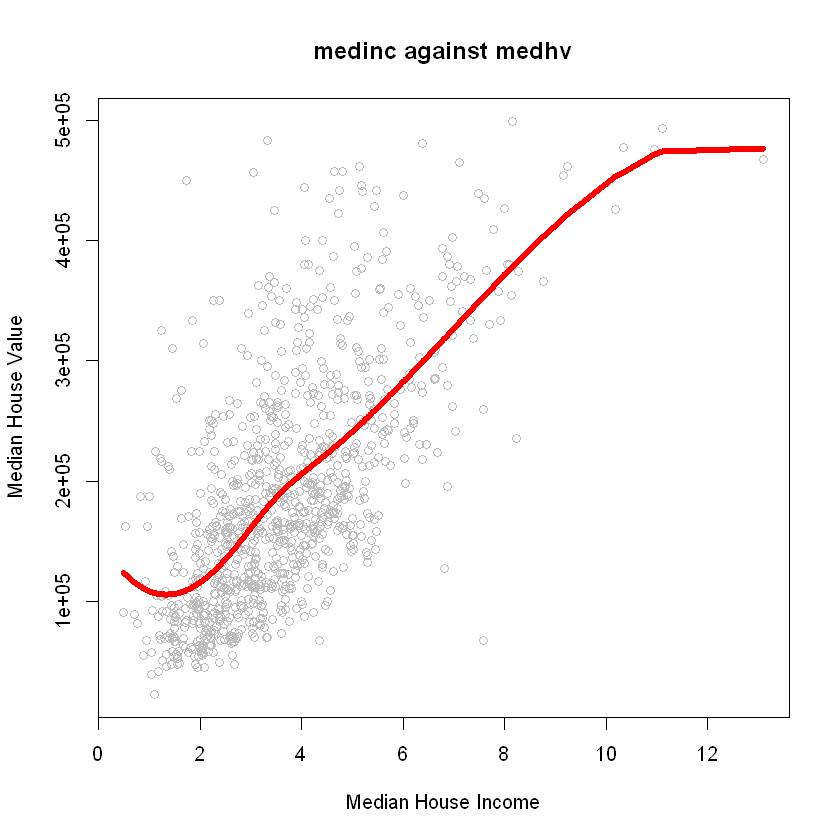

In [1168]:
plot( medinc, medhv, col="grey", ylab="Median House Value", xlab="Median House Income", main="medinc against medhv")
    lines(medinc, temp2, col="red", lwd=5)
#note: if you run all of the document, the graph below will look wrong. Re run section (g) on its own manually to 
#get the correct graph. 

Based on visual inspection, the spline fits the data well enough. The line goes through the bulk of the data and has the same trend. 

v. find RMSE of spline on test data: 

In [1169]:
predictionTest <-  predict(cubSpline , newdata=list(medinc=test$medinc ))
rmseSpline <- sqrt( mean( ( test$medhv - predictionTest   )^2   )  )



In [1170]:
rmseSpline

[1] 77095.46

 ## (h) 

In [1171]:
linearPoly4 <- lm(medhv ~ poly(medinc, 4))

In [1172]:
predictionPoly4 <- predict(linearPoly4, newdata=list(medinc=test$medinc))

rmsePoly4 <- sqrt( mean( (test$medhv-predictionPoly4)^2   )  )

In [1173]:
cat("the RMSE for the spline is:", rmseSpline, "\n")
cat("the RMSE fo the polynomial is:", rmsePoly4) 


the RMSE for the spline is: 77095.46 
the RMSE fo the polynomial is: 77527.8

Since the RMSE for the spline is lower than the RMSE for the polynomial, we will conclude that spline is better for predicting on the test data. There is a difference of ~450, which is significant